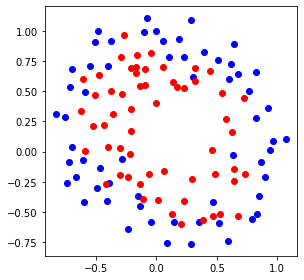

In [276]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("/content/drive/My Drive/AssignmentFolder/Assignment07/data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]  

plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

#Logistic regularization : $J(\theta) = {1\over2m}||h(x_i) - y_i||  + {1\over\lambda}\Sigma_{j = 1}^k \theta_k^2$
#gradient descent : 
set lamba to make overfitting, underfitting, just right


In [277]:
degree = 10
#X_poly : (x^2 * y) 와 같이, 모든 차수들이 포함되어있는 matrix
#첫째항이 np.ones인 이유는 theta0값을 그대로 출력하기 위해
X_poly = np.ones(len(pointX))
for i in range(0, degree):  
  for j in range(0, degree):
      #0,0은 모두 1로 채우기 위해 이 경우 제외하고
      if i != 0 or j != 0:
        #쌓는다
        X_poly = np.column_stack([X_poly, (pointX ** i) * (pointY ** j)])

#X_poly의 차수만큼 theta들 생성
#1. overfitting
Theta1 = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)
#2. justrightfitting
Theta2 = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)
#3. underfitting
Theta3 = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)

#위처럼 생성할 경우 matrix 형식으로생성됨
#squeeze로 list화 시킨다. dot곱을 위함.
T1 = np.squeeze(Theta1, 1)
T2 = np.squeeze(Theta2, 1)
T3 = np.squeeze(Theta3, 1)

#sigmoid
z1 = X_poly.dot(T1)
sigz1 = 1 / (1 + np.exp(-z1))

z2 = X_poly.dot(T2)
sigz2 = 1 / (1 + np.exp(-z2))

z3 = X_poly.dot(T3)
sigz3 = 1 / (1 + np.exp(-z3))

#label transpose & 후에 matrix곱을 위한 matrix화
#np.transpose를 쓰면 error, np.T를 사용한다.
l = np.mat(label).T

#error
E_list1 = []
E_list2 = []
E_list3 = []
E1 = 0
E2 = 0
E3 = 0
#accuracy
accuracy = 0
accuracy_list1 = []
accuracy_list2 = []
accuracy_list3 = []

#기타 상수항
alpha = 0.0003
#lambda
lmbd1 = 0.00000000001
lmbd2 = 0.01
lmbd3 = 1
#적절한 threshold
Threshold = 0.00000003


#Underfitting's gradient descent, accuracy
#overfitting가 제일 많이 loop돌테니 이 횟수만큼 다른 것도 iter돈다
iter = 0
iter1 = 0
while 1:      
  #sigmoid
  T1 = np.squeeze(Theta1, 1)
  z1 = X_poly.dot(T1)
  sigz1 = 1 / (1 + np.exp(-z1))
  #accuracy         
  acc = (sigz1 > 0.5)
  accuracy = (acc == label)
  accuracy_list1.append((np.sum(accuracy) / len(label)) * 100)
  #Error
  tmp1 = E1
  E1 = (np.sum(-label * np.log(sigz1) - (1-label) * np.log(1-sigz1)) / len(label)) + lmbd1 * np.sum(np.power(Theta1, 2)) / 2
  E_list1.append(E1)
  #gradient
  sigz1 = np.mat(sigz1).T
  Theta1 -= alpha * (np.dot(X_poly.T, (sigz1 - l)) / len(label) + lmbd1 * np.sum(Theta1))
  iter1 += 1
  iter += 1
  if abs(tmp1 - E1) < Threshold:
      print(abs(tmp1 - E1))
      break 
print(iter1)

2.9999978778949554e-08
1355737


In [278]:
iter2 = 0
while 1:      
  #sigmoid
  T2 = np.squeeze(Theta2, 1)
  z2 = X_poly.dot(T2)
  sigz2 = 1 / (1 + np.exp(-z2))
  #accuracy
  acc = (sigz2 > 0.5)
  accuracy = (acc == label)
  accuracy_list2.append((np.sum(accuracy) / len(label)) * 100)
  #Error
  tmp2 = E2
  E2 = (np.sum(-label * np.log(sigz2) - (1-label) * np.log(1-sigz2)) / len(label)) + lmbd2 * np.sum(np.power(Theta2, 2)) / 2
  E_list2.append(E2)
  #gradient
  sigz2 = np.mat(sigz2).T
  Theta2 -= alpha * (np.dot(X_poly.T, (sigz2 - l)) / len(label) + lmbd2 * np.sum(Theta2))
  iter2 += 1
  if abs(tmp2 - E2) < Threshold:
      print(abs(tmp1 - E1))
      break 
print(iter2)

2.9999978778949554e-08
221334


In [279]:
dkiter3 = 0
while 1:      
  #sigmoid
  T3 = np.squeeze(Theta3, 1)
  z3 = X_poly.dot(T3)
  sigz3 = 1 / (1 + np.exp(-z3))
  #accuracy
  acc = (sigz3 > 0.5)
  accuracy = (acc == label)
  accuracy_list3.append((np.sum(accuracy) / len(label)) * 100)
  #Error
  tmp3 = E3
  E3 = (np.sum(-label * np.log(sigz3) - (1-label) * np.log(1-sigz3)) / len(label)) + lmbd3 * np.sum(np.power(Theta3, 2)) / 2
  E_list3.append(E3)
  #gradient
  sigz3 = np.mat(sigz3).T
  Theta3 -= alpha * (np.dot(X_poly.T, (sigz3 - l)) / len(label) + lmbd3 * np.sum(Theta3))
  iter3 += 1
  if abs(tmp3 - E3) < Threshold:
      break 
print(iter3)

6270


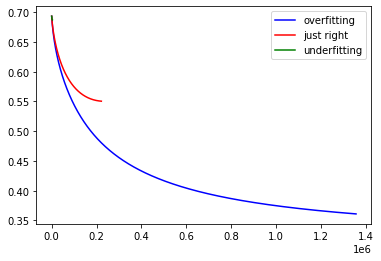

In [280]:
plt.plot(E_list1, c='r', label="overfitting")
plt.plot(E_list2, c='g', label="just right") 
plt.plot(E_list3, c='b', label="underfitting") 
plt.legend()
plt.show() 

In [0]:
print(accuracy_list1[len(accuracy_list1) - 1], "%")

83.05084745762711 %


In [0]:
print(accuracy_list2[len(accuracy_list2) - 1], "%")

81.35593220338984 %


In [0]:
print(accuracy_list3[len(accuracy_list3) - 1], "%")

60.16949152542372 %


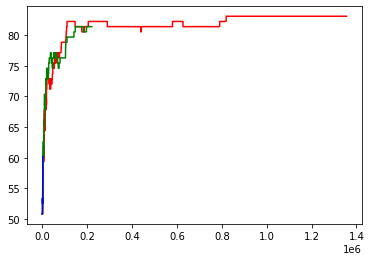

In [281]:
plt.figure() 
plt.plot(accuracy_list1, c='r') 
plt.plot(accuracy_list2, c='g') 
plt.plot(accuracy_list3, c='b') 
plt.show() 

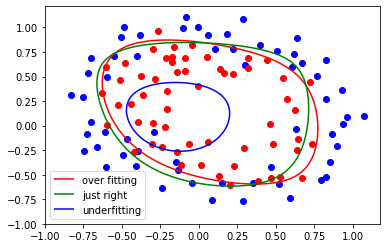

In [282]:
x_graph = np.arange(-1, 1, 0.01) 
y_graph = np.arange(-1, 1, 0.01)   
X, Y = np.meshgrid(x_graph, y_graph) 
#meshgrid된 2차원 X, Y를 1차원으로 핀다
X = np.ravel(X)
Y = np.ravel(Y)  
#XY를 위의 X_poly처럼 합쳐준다
XY = np.ones(len(X))
for i in range(0, degree):  
  for j in range(0, degree):
      #0,0인경우는 제외
      if i != 0 or j != 0:
        XY = np.column_stack((XY, (X ** i) * (Y ** j)))
#z = theta * X
#overfitting
Z1 = XY.dot(Theta1)
#just right
Z2 = XY.dot(Theta2)
#underfitting
Z3 = XY.dot(Theta3)

#다시 matrix로 되돌린다
X = X.reshape((len(x_graph), len(y_graph)))
Y = Y.reshape((len(x_graph), len(y_graph)))
Z1 = Z1.reshape((len(x_graph), len(y_graph)))
Z2 = Z2.reshape((len(x_graph), len(y_graph)))
Z3 = Z3.reshape((len(x_graph), len(y_graph)))
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
OF = plt.contour(X,Y,Z1,levels=[0],colors = 'r')
JR = plt.contour(X,Y,Z2,levels=[0],colors = 'g')
UF = plt.contour(X,Y,Z3,levels=[0],colors = 'b')
OF.collections[0].set_label("over fitting")
JR.collections[0].set_label("just right")
UF.collections[0].set_label("underfitting")
plt.legend()
plt.show()

#출력 파트

#1. Plot the training data

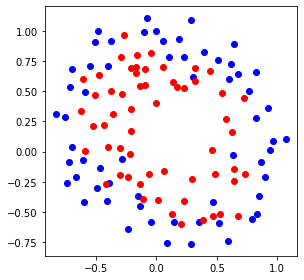

In [283]:
plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

#2. Plot the training error with varying regularization parameters

##Gradient descent
$J(\theta) = {1\over2m}||h(x_i) - y_i||  + {1\over\lambda}\Sigma_{j = 1}^k \theta_k^2$ \\
$\theta_{i,j}^{t+1}:=\theta_{i,j}^{t} - \alpha[{1\over m}\Sigma_{i=1}^m(\sigma(g(x^{(i)},y^{(i)}:\theta^{(t)}) - l^{(i)}) \delta {g(x^{(i)},y^{(i)}:\theta^{(t)})\over\delta \theta_{(i, j)}} + \lambda\theta^{(t)}_{i,j}]$

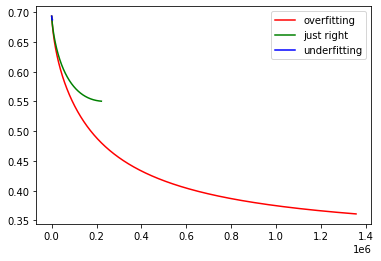

In [284]:
plt.plot(E_list1, c='r', label="overfitting")
plt.plot(E_list2, c='g', label="just right") 
plt.plot(E_list3, c='b', label="underfitting") 
plt.legend()
plt.show() 

#3. Display the values of the chosen regularization parameters
$\lambda1 : over fitting \\
\lambda2 : just right \\
\lambda3 : under fitting$

In [285]:
print("overfitting lambda1 : ", lmbd1)
print("just right lambda2 : ", lmbd2)
print("underfitting lambda3 : ", lmbd3)

overfitting lambda1 :  1e-11
just right lambda2 :  0.01
underfitting lambda3 :  1


#4. Plot the training accuracy with varying regularization parameters

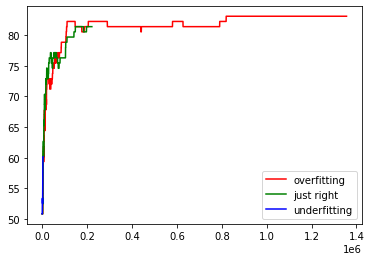

In [286]:
plt.figure() 
plt.plot(accuracy_list1, c='r', label="overfitting") 
plt.plot(accuracy_list2, c='g', label="just right") 
plt.plot(accuracy_list3, c='b', label="underfitting") 
plt.legend()
plt.show() 

#5. Display the final training accuracy with varying regularization parameters
$\lambda1 : over fitting \\
\lambda2 : just right \\
\lambda3 : under fitting$

In [287]:
print("overfitting : ", accuracy_list1[len(accuracy_list1) - 1], "%")
print("just right : ", accuracy_list2[len(accuracy_list2) - 1], "%")
print("underfitting : ", accuracy_list3[len(accuracy_list3) - 1], "%")

overfitting :  83.05084745762711 %
just right :  81.35593220338984 %
underfitting :  60.16949152542372 %


#6. Plot the optimal classifier with varying regularization parameters superimposed on the training data

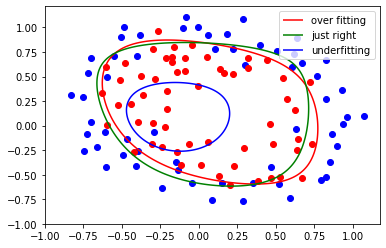

In [293]:
plt.figure(figsize=(6,4))
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
OF = plt.contour(X,Y,Z1,levels=[0],colors = 'r')
JR = plt.contour(X,Y,Z2,levels=[0],colors = 'g')
UF = plt.contour(X,Y,Z3,levels=[0],colors = 'b')
OF.collections[0].set_label("over fitting")
JR.collections[0].set_label("just right")
UF.collections[0].set_label("underfitting")
plt.legend(loc = "upper right")
plt.show()

#PS. 잘 보이지 않는 그래프 따로 빼서 출력 

Under fitting graph(green graph)


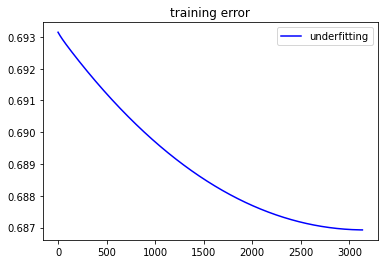

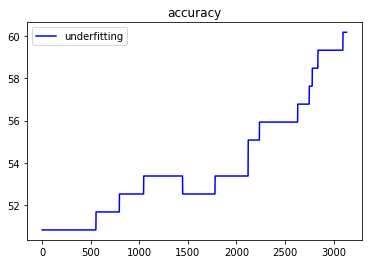

In [290]:
plt.figure()
plt.title("training error")
plt.plot(E_list3, c='b', label="underfitting") 
plt.legend()
plt.show() 
plt.figure()
plt.title("accuracy")
plt.plot(accuracy_list3, c='b', label="underfitting") 
plt.legend()
plt.show() 